# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context of the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
w = data[data.race=='w']
b = data[data.race=='b']

In [3]:
print( "black call backs: " + str(sum(data[data.race=='b'].call)) )
print( "white call backs: " + str(sum(data[data.race=='w'].call)) )
print( "black call backs ratio: " + str(sum(data[data.race=='b'].call)/len(data[data.race=='b'])) )
print( "white call backs ratio: " + str(sum(data[data.race=='w'].call)/len(data[data.race=='w'])) )
print( "difference in call backs ratio: " + str(sum(data[data.race=='w'].call)/len(data[data.race=='w']) - sum(data[data.race=='b'].call)/len(data[data.race=='b'])) )
print( "black call backs absoulute ratio: " + str(sum(data[data.race=='b'].call)/len(data)) )
print( "white call backs absoulute ratio: " + str(sum(data[data.race=='w'].call)/len(data)) )

black call backs: 157.0
white call backs: 235.0
black call backs ratio: 0.06447638603696099
white call backs ratio: 0.09650924024640657
difference in call backs ratio: 0.032032854209445585
black call backs absoulute ratio: 0.03223819301848049
white call backs absoulute ratio: 0.048254620123203286


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [4]:
# 1.) What test is appropriate for this problem? Does CLT apply?
# 2.) What are the null and alternate hypotheses?

* Null Hypothesis: There is bias based on race for the rate of callbacks, a difference of 0.032 occurs often (greater than 5% of the time) once the data is randomized numerous times. 
* Alternate Hypothesis: There is not a bias based on race for the rate of callbacks, a difference of 0.032 does not occur often (less than 5% of the time) once the data is randomized numerous times.

Central Limit Theorem Conditions:
1. Randomization: During this anaysis we have to assume that the data is random and if we are proven wrong then we can   conclude a bias based on some factor.
2. 10% rule: There are 4780 rows in the dataset so I am sure that this is less than 10% of the population.
3. np = 157 or 235, n(1-p) = 2200 or 2278: greater than 10. (condition met)

Game Plan:
1. Calculate 90% confidence interval for callback rates for white sounding names.
2. Calculate 90% confidence interval for callback rates for black sounding names.
3. Take many random samples or the difference of each race's success rate and calculate a 90% confidence interval.
4. Graph the results, beware of what positive and negative values imply. 


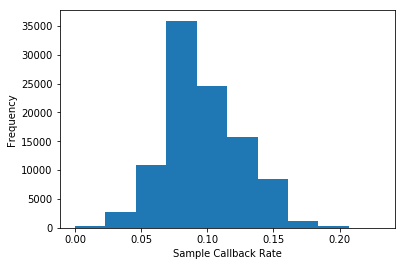

We are 90% confident that the success callback rate for whites is within: 0.04-0.16
Mean value: 0.0966144


In [6]:
# Your solution to Q3 here
# 3.) Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

#White Data

samples_success_rates_white = np.empty(100000)

for i in range(100000):
    samples_statistics_random = np.random.choice( w['call'], size=100 )
    samples_success_rates_white[i] = np.sum(samples_statistics_random)/100

plt.hist(samples_success_rates_white, bins=10)
plt.xlabel("Sample Callback Rate")
plt.ylabel("Frequency")
plt.show()

confidence_interval_white = str( round(samples_success_rates_white.mean()-2.055*samples_success_rates_white.std(),2) ) + '-' + str( round(samples_success_rates_white.mean()+2.055*samples_success_rates_white.std(),2) )
print("We are 90% confident that the success callback rate for whites is within: " + confidence_interval_white)
print("Mean value: " + str(samples_success_rates_white.mean()))

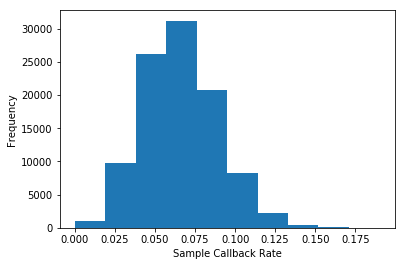

We are 90% confident that the success callback rate for blacks is within: 0.01-0.12
Mean value: 0.06448480000000001


In [7]:
#Black Data

samples_success_rates_black = np.empty(100000)

for i in range(100000):
    samples_statistics_random = np.random.choice( b['call'], size=100 )
    samples_success_rates_black[i] = np.sum(samples_statistics_random)/100

plt.hist(samples_success_rates_black, bins=10)
plt.xlabel("Sample Callback Rate")
plt.ylabel("Frequency")
plt.show()

confidence_interval_black = str( round(samples_success_rates_black.mean()-2.055*samples_success_rates_black.std(),2) ) + '-' + str( round(samples_success_rates_black.mean()+2.055*samples_success_rates_black.std(),2) )
print("We are 90% confident that the success callback rate for blacks is within: " + confidence_interval_black)
print("Mean value: " + str(samples_success_rates_black.mean()))

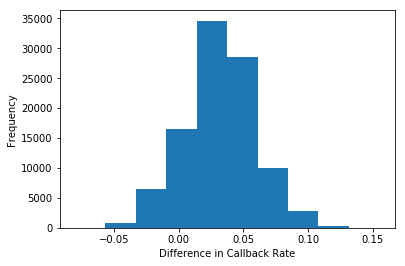

p-value = 0.49901999999999996
We are 90% confident that the difference in rates is within: -0.02-0.09
Mean value: 0.031999049999999994
A positive value correlates with whites having the greater success rate and vice versa for negative values.
Number of instances of positive values is 0.86223
Number of instances of negative values is 0.10109


In [15]:
difference_of_rates_with_race = np.empty(100000)

for i in range(100000):
    samples_statistics_random_white = np.random.choice( w['call'], size=200 )
    samples_statistics_random_black = np.random.choice( b['call'], size=200 )
    white_sample = np.sum(samples_statistics_random_white)/200
    black_sample = np.sum(samples_statistics_random_black)/200
    difference_of_rates_with_race[i] = white_sample - black_sample
    
 
plt.hist(difference_of_rates_with_race, bins=10)
plt.xlabel("Difference in Callback Rate")
plt.ylabel("Frequency")
plt.show()
print( "p-value = " + str( (np.sum(difference_of_rates_with_race >= 0.032))/(len(difference_of_rates_with_race)) +  (np.sum(difference_of_rates_with_race <= -0.032))/(len(difference_of_rates_with_race)) ) )

confidence_interval_with_race = str( round(difference_of_rates_with_race.mean()-2.055*difference_of_rates_with_race.std(),2) ) + '-' + str( round(difference_of_rates_with_race.mean()+2.055*difference_of_rates_with_race.std(),2) )
print( "We are 90% confident that the difference in rates is within: " + confidence_interval_with_race )
print( "Mean value: " + str(difference_of_rates_with_race.mean()) )
print( "A positive value correlates with whites having the greater success rate and vice versa for negative values.")
print( "Number of instances of positive values is " + str( (np.sum(difference_of_rates_with_race > 0))/(len(difference_of_rates_with_race)) ))
print( "Number of instances of negative values is " + str( (np.sum(difference_of_rates_with_race < 0))/(len(difference_of_rates_with_race)) ))

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

After analyzing the whites sounding names data, the black sounding names data, and the difference in success rates, we clearly see a bias. In the difference of callback rates analysis (above), the difference was calaulated with the white callback minus the black callback rate. After running this simulation 100,000 times we see that 86% percent of the time there is a positive value meaning that, white sounding names have a higher callback rate than black sounding names 86% of the time. The mean value of callback rates for white sounding names is 9.7% and the mean value of callback rates for black sounding names is 6.4%.

# Extra: Analysis Without Consideration for Race

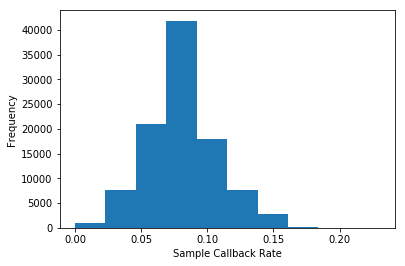

We are 90% confident that the success callback rate for anyone is within: 0.02-0.14
Mean value: 0.0805634


In [13]:
#All Data

samples_success_rates_all = np.empty(100000)

for i in range(100000):
    samples_statistics_random = np.random.choice( data['call'], size=100 )
    samples_success_rates_all[i] = np.sum(samples_statistics_random)/100

plt.hist(samples_success_rates_all, bins=10)
plt.xlabel("Sample Callback Rate")
plt.ylabel("Frequency")
plt.show()

confidence_interval_all = str( round(samples_success_rates_all.mean()-2.055*samples_success_rates_all.std(),2) ) + '-' + str( round(samples_success_rates_all.mean()+2.055*samples_success_rates_all.std(),2) )
print("We are 90% confident that the success callback rate for anyone is within: " + confidence_interval_all)
print("Mean value: " + str(samples_success_rates_all.mean()))

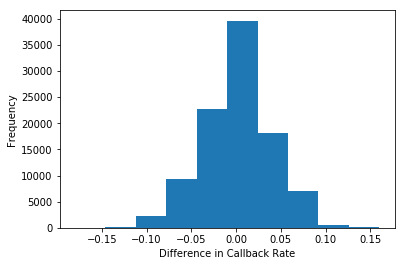

p-value = 0.35901


In [14]:


difference_of_rates = np.empty(100000)

for i in range(100000):
    samples_statistics_random = np.random.choice( data['call'], size=200 )
    first_half = np.sum(samples_statistics_random[:100])/100
    second_half = np.sum(samples_statistics_random[100:])/100
    difference_of_rates[i] = first_half - second_half
    
 
plt.hist(difference_of_rates, bins=10)
plt.xlabel("Difference in Callback Rate")
plt.ylabel("Frequency")
plt.show()
print("p-value = " + str( (np.sum(difference_of_rates >= 0.032))/(len(difference_of_rates)) +  (np.sum(difference_of_rates <= -0.032))/(len(difference_of_rates)) ) )